In [2]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

##Problem Statement
```
To find out the best squad for the upcoming FIFA football championship. 
```

In [4]:
#Feature Description
feat_desc= pd.read_excel('/content/drive/MyDrive/FIFA_project/DataDictionary.xlsx')
feat_desc

,Feature,Description
0,Name,Player name
1,Age,Age of the player
2,Nationality,Country name
3,Overall,Value of the player
4,Potential,Strength of the player
5,Club,Club name of the player
6,Value (M),Income
7,Position,Position of the player
8,Wage (M),Monthly income


### Load the dataset


In [5]:
# Read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/My Drive/FIFA_project/train.csv')
df_test=pd.read_csv('/content/drive/My Drive/FIFA_project/test.csv')

# Dropping Ids
train_id = df_train['Id']

df_train.drop(['Id'], axis=1, inplace=True)


In [6]:
# Examine first 5 rows
df_train.head()

,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [7]:
# No. of rows and columns
print(df_train.shape)

# Examine the column names
print(df_train.columns)


(14384, 9)
Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value (M)', 'Wage (M)', 'Position'],
      dtype='object')


In [8]:
# Examine no. of non null entries, and column datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         14384 non-null  object 
 1   Age          14384 non-null  int64  
 2   Nationality  14384 non-null  object 
 3   Overall      14384 non-null  int64  
 4   Potential    14384 non-null  int64  
 5   Club         14173 non-null  object 
 6   Value (M)    14384 non-null  float64
 7   Wage (M)     14384 non-null  float64
 8   Position     14384 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1011.5+ KB


In [9]:
#Calculate Summary Statistics
df_train.describe()

,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,25.148776,66.237695,71.181869,2.344967,0.011435
std,4.620911,6.954458,6.074111,5.105376,0.022614
min,16.000000,46.000000,46.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,0.300000,0.002000
50%,25.000000,66.000000,71.000000,0.675000,0.004000
75%,28.000000,71.000000,75.000000,2.100000,0.012000
max,47.000000,94.000000,94.000000,105.000000,0.565000


In [10]:
#Calculate object data summary statistics
df_train.describe(include=['object'])

,Name,Nationality,Club,Position
count,14384,14384,14173,14384
unique,13708,158,647,15
top,J. Rodríguez,England,Villarreal CF,CB
freq,6,1288,33,2144


### Visualize the data

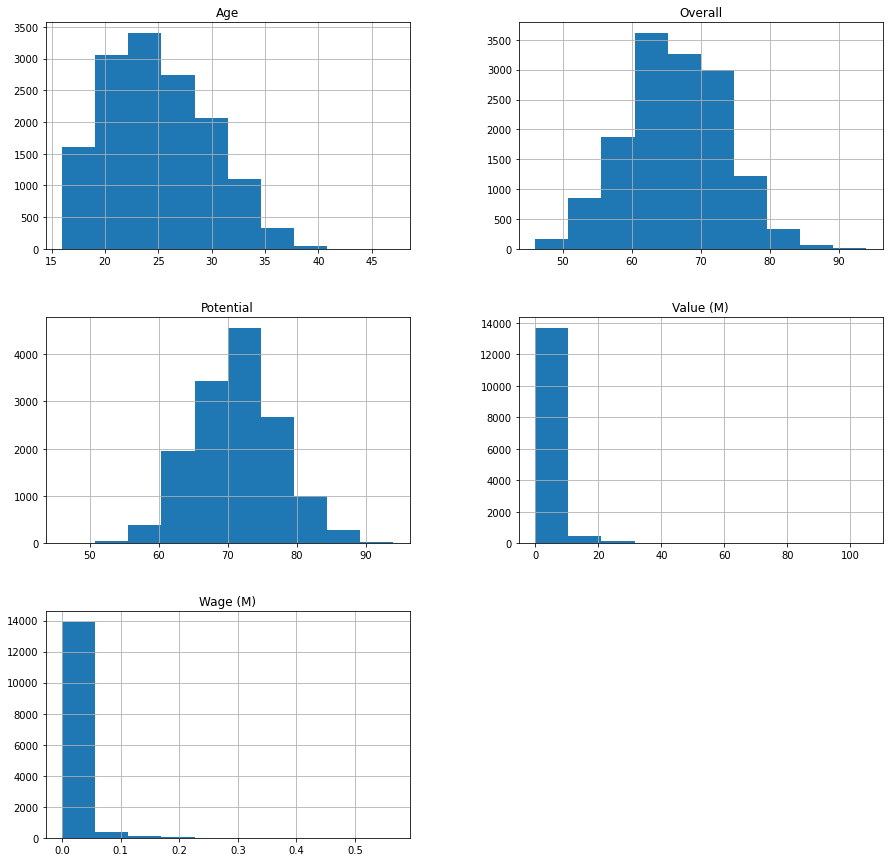

In [11]:
# Data distribution

data_distribution = df_train.hist(figsize=(15,15))
plt.show();

# Obs:
#Overall, Potential are normally distributed
#Age: Majority of Young Players 
#Wage(M), Value(M) are right skewed


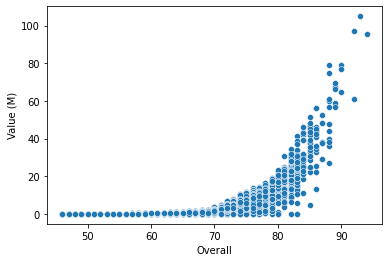

In [12]:
#Overall 
sns.scatterplot(x='Overall', y='Value (M)', data=df_train)

# Not Linear Relationship

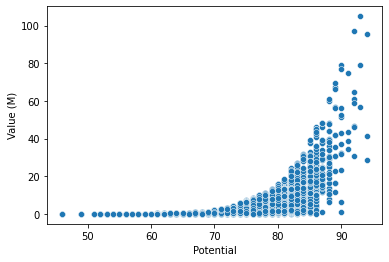

In [13]:
#Potential  
sns.scatterplot(x='Potential', y='Value (M)', data=df_train)

# Not Linear Relationship

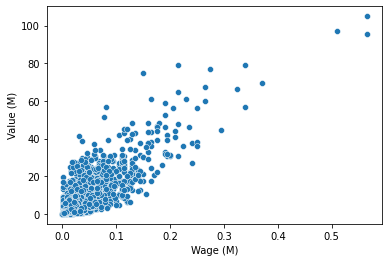

In [14]:
#Wage (M)
sns.scatterplot(x='Wage (M)', y='Value (M)', data=df_train)

#Linear Relationship

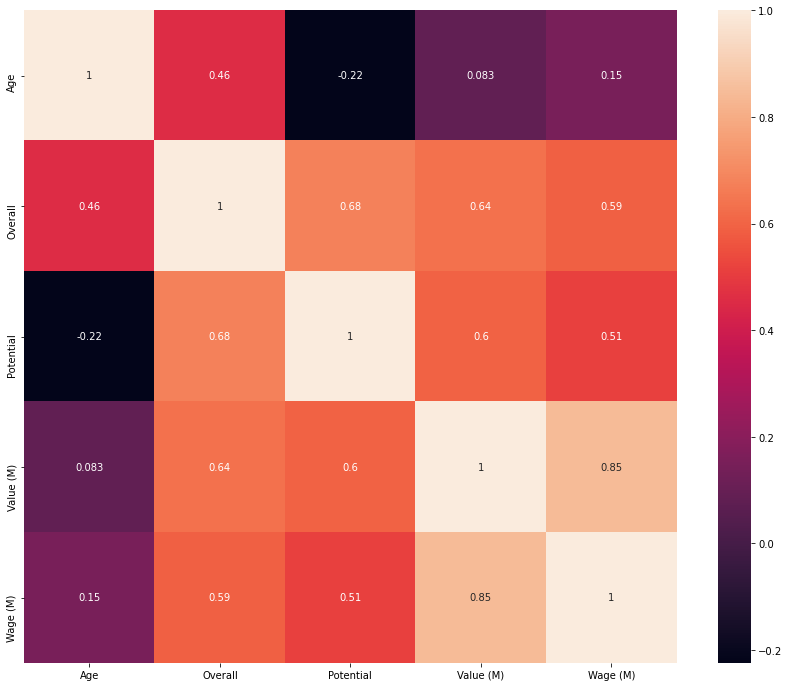

In [15]:
# correlation
corr = df_train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr,square=True,annot = True)
plt.show();

#Wage (M), Potential, Overall are strongly correlated with target (Value (M))

### Model building



In [16]:
#Splitting training set
X=df_train[['Potential','Overall','Wage (M)']]
y=df_train['Value (M)']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)


   Potential  Overall  Wage (M)
0         58       54     0.001
1         73       64     0.010
2         79       72     0.013
3         66       57     0.002
4         75       63     0.002
0    0.07
1    0.70
2    3.70
3    0.16
4    0.55
Name: Value (M), dtype: float64
(10788, 3)
(3596, 3)


In [17]:
# Fitting Polynomial Feature to the dataset 

poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train) 
X_valid_poly=poly.fit_transform(X_valid)

In [18]:
# fit the model
linreg = LinearRegression()  
linreg.fit(X_train_poly, y_train)

# making predictions
y_pred = linreg.predict(X_valid_poly)

#Calculating Error
rmse=np.sqrt(mean_squared_error(y_valid, y_pred))
print(rmse)


1.3047088776573645


In [19]:
# R-squared calculation
rsquared = r2_score(y_valid,y_pred)
print(rsquared)

0.9201084796886321


### Prediction on the test data and creating the sample submission file.



In [20]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)


(3597, 8)
Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Wage (M)', 'Position'],
      dtype='object')


In [21]:
#Features selected from test data
X_test=df_test[['Potential','Overall','Wage (M)']]
X_test_poly = poly.fit_transform(X_test) 

#make prediction : Value (M)
ytest_pred=linreg.predict(X_test_poly)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "Value (M)": ytest_pred})
print(subm.head())


      Id  Value (M)
0    280  15.980812
1    569  19.944447
2   8731   1.335709
3  10085   0.284167
4   9831   0.719465


In [22]:
# To CSV for submission
#subm.to_csv('submission_1.csv',index=False)

#from google.colab import files
#files.download('submission_1.csv') 